## Визуализация данных о метро и городах

In [7]:
import matplotlib.pyplot as plt
import csv
import json

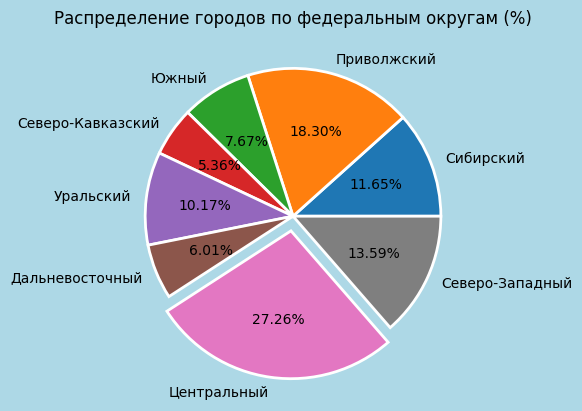

In [8]:
file_cities_csv = "cities.csv"

cities = {}
with open(file_cities_csv) as f:
    reader = csv.DictReader(f, delimiter=';')
    for line in reader:
        if line['Федеральный округ'] not in cities:
            cities[line['Федеральный округ']] = 1
        else:
            cities[line['Федеральный округ']] += 1

labels = cities.keys()
values = cities.values()

fig = plt.figure()
ax = fig.add_subplot()
fig.set_facecolor("lightblue")

explode = [0,0,0,0,0,0,0.1,0]
ax.set_title('Распределение городов по федеральным округам (%)')
ax.pie(values, labels=labels, autopct='%.2f%%', explode=explode, wedgeprops={"linewidth": 2, "edgecolor": "white"})

plt.show()

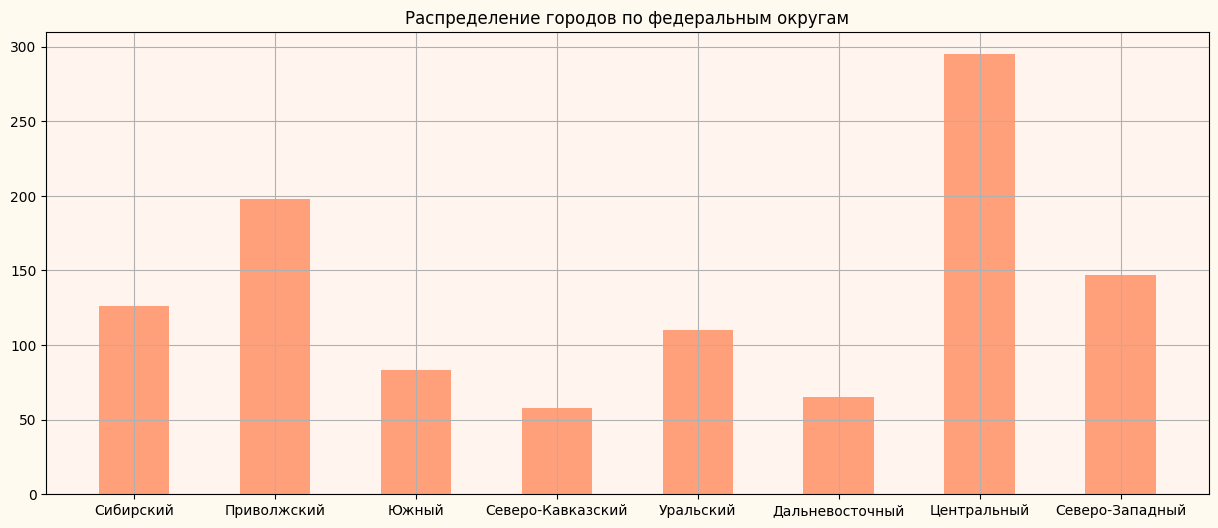

In [9]:
x = labels
y = values

fig, ax = plt.subplots()

ax.bar(x, y, color='lightsalmon', width=0.5)
ax.grid()

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(15)
fig.set_figheight(6)

ax.set_title('Распределение городов по федеральным округам')

plt.show()

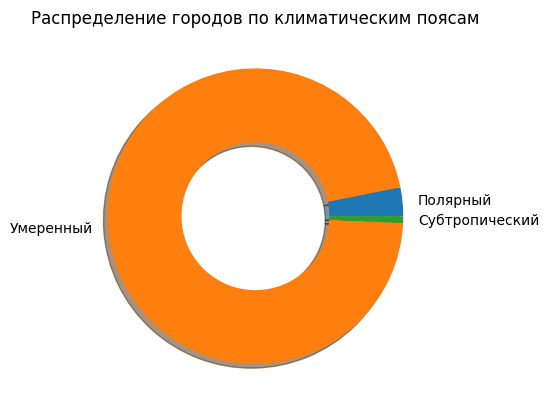

In [10]:
cities = {}
with open(file_cities_csv) as f:
    reader = csv.DictReader(f, delimiter=';')
    cities['Полярный'] = 0
    cities['Умеренный'] = 0
    cities['Субтропический'] = 0
    for line in reader:
        if float(line['lat'].replace(',', '.')) >= 43 and float(line['lat'].replace(',', '.')) <= 65:
            cities['Умеренный'] += 1
        elif float(line['lat'].replace(',', '.')) > 65:
            cities['Полярный'] += 1
        else:
            cities['Субтропический'] += 1

labels = cities.keys()
values = cities.values()

fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Распределение городов по климатическим поясам')
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), shadow=True)

plt.show()

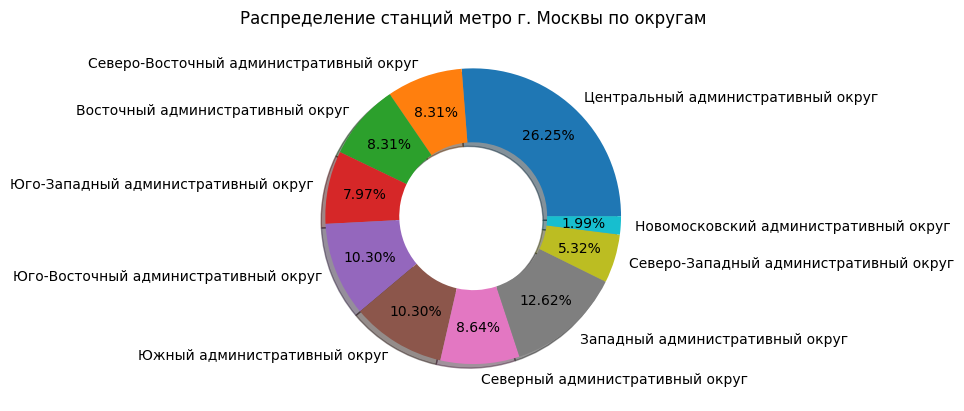

In [11]:
file_mosmetro_json = 'mosmetro.json'

areas = {}
with open(file_mosmetro_json) as f:
    d = json.load(f)
    for line in d:
        if line['AdmArea'] not in areas:
            areas[line['AdmArea']] = 1
        else:
            areas[line['AdmArea']] += 1

labels = areas.keys()
values = areas.values()

fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Распределение станций метро г. Москвы по округам')
ax.pie(values, labels=labels, autopct='%.2f%%', pctdistance=0.75, wedgeprops=dict(width=0.5), shadow=True)

plt.show()

{'действует': 290, 'строится': 6, 'временно закрыт': 5}


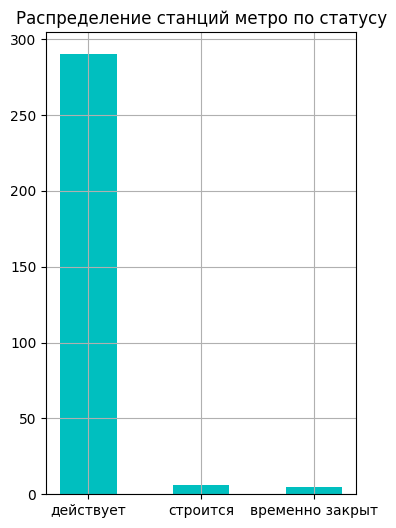

In [12]:
status = {}
with open(file_mosmetro_json) as f:
    d = json.load(f)
    for line in d:
        if line['ObjectStatus'] not in status:
            status[line['ObjectStatus']] = 1
        else:
            status[line['ObjectStatus']] += 1
print(status)

x = status.keys()
y = status.values()

fig, ax = plt.subplots()

ax.bar(x, y, color='c', width=0.5)
ax.grid()

fig.set_figwidth(4)
fig.set_figheight(6)

ax.set_title('Распределение станций метро по статусу')

plt.show()

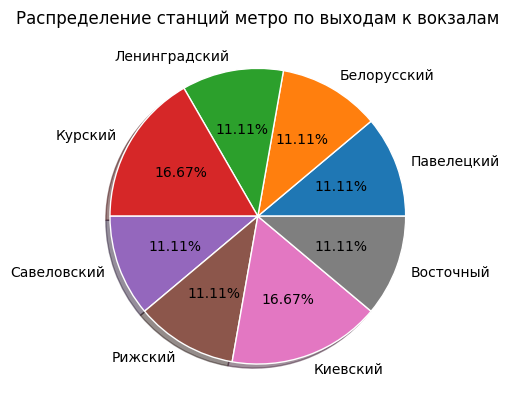

In [13]:
station = {}
with open(file_mosmetro_json) as f:
    d = json.load(f)
    for line in d:
        if 'RailwayTerminal' in line:
            if line['RailwayTerminal']['value'] not in station:
                station[line['RailwayTerminal']['value']] = 1
            else:
                station[line['RailwayTerminal']['value']] += 1

labels = station.keys()
values = station.values()

fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Распределение станций метро по выходам к вокзалам')
ax.pie(values, labels=labels, autopct='%.2f%%', shadow=True, wedgeprops={"linewidth": 1, "edgecolor": "white"})

plt.show()